<center>
<img src="FIFA-19-Background-1-768x401.jpg" />
    
## Aprendizaje No Supervisado 2020 DiploDatos
    Laura Alonso Alemany, Ana Georgina Flesia y Valeria Rulloni
## Agrupamiento con el FIFA 2019 dataset
    
Material basado en notas de Ana Georgina Flesia bajo los términos y condiciones de la licencia [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/), a su vez basado de material de [SilveMel](https://www.kaggle.com/karangadiya/fifa19/downloads/data.csv/comments) y otros.

### Indice de temas
1. [Inicialización del entorno](#1.-Inicialización-del-entorno)
2. [Preparación de los datos](#2.-Preparación-de-los-datos)
3. [Clustering KM](#3.-Clustering-con-Kmeans)
4. [Clustering MS](#4.-Clustering-con-Mean-Shift)
5. [Clustering KM2](#5.-Clustering-con-Kmeans-sin-arqueros)
6. [Clustering MS2](#6.-Clustering-con-Mean-Shift-sin-arqueros)

##Objetivo:
    Agrupar jugadores usando características generales en cuatro grupos que representen posiciones preferidas del
    juego:
    
    Defensa
    Medio campo
    Ataque
    Arqueros
    

## 1.-Inicialización-del-entorno

Empezamos cargando algunas herramientas para cargar los datos y manipularlos.

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

Para visualización usamos plotly, pero podemos usar seaborn tambien, o matplotlib. 

In [2]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns

## 2.-Preparación-de-los-datos

Cargamos los datos bajados de la database de [Kaggle](https://www.kaggle.com/karangadiya/fifa19) como 'data.csv'. 

In [3]:
df=pd.read_csv("players_20.csv")

**Preparamos la base para Clustering:**

**Retiramos jugadores con bajo Desempeño global ("Overall")**

**y consideramos Variables de desempeño por habilidad (skills_ratings)**

In [127]:
n=10000

df_n=df.loc[:n] #los primeros n
df_n=df_n[(df_n['overall']>70)] # mejores jugadores

skills_ratings = ['attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning']

print(len(skills_ratings))

df_skills=df_n[skills_ratings]


33


# 3.-Clustering-con-Kmeans

ES necesario definirle la cantidad de grupos/clusters (n_clusters), es un hiperparámetro del algoritmo. 


In [128]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

# Número de clusters buscado
n_clust = 5

km = KMeans(n_clusters=n_clust)
km.fit(df_skills)

# Recuperacion de etiquetas
clusters = km.labels_
print('Suma de los cuadrados de las distancias al cluster / Inertia: ', km.inertia_)

Suma de los cuadrados de las distancias al cluster / Inertia:  11065057.276887193


**Elección de la cantidad de grupos/clusters**

Una forma de seleccionar la cantidad más adecuada de clusters es probar varias cantidades y usar el criterio del codo: "elbow method", utilizando una medida de ajuste que puede ser Inertia.

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

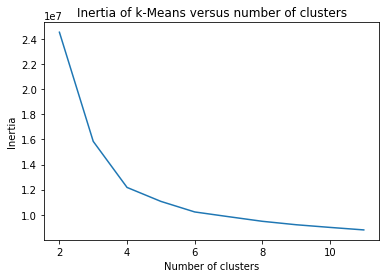

In [129]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores = [KMeans(n_clusters=i+2).fit(df_skills).inertia_ for i in range(10)]

from matplotlib import pyplot as plt
plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")
#intertia: within-cluster sum-of-squares 

**Graficamos el resultado kmedias con la cantidad de clases elegida: Visualizamos de a dos variables por vez**

In [130]:
data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86


#Eligo dos números entre 0 y  de n_skills-1
skill_1='defending_sliding_tackle'
skill_2='attacking_short_passing'


kmean_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Ckacks!!',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [131]:
df_clusters=df_n.copy()
df_clusters['kmeans'] = km.labels_ #clusters
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros forzamos la cantidad')

Kmeans encontró:  5 clusters, nosotros forzamos la cantidad


**EVALUACIÓN**

**EJERCICIO: Análisis exploratorio de los clusters, usando las clases asignadas por kmeans** 
- Cantidad de observaciones por Cluster
- Análisis descriptivo separando por Cluster
- Tabla de contingencia alguna categórica vs clusters
- Silohuette?


In [132]:
df_clusters.groupby(by=['kmeans']).size()

kmeans
0     649
1     440
2     929
3    1075
4    1663
dtype: int64

In [133]:
len(set(df_clusters['kmeans']))

5

In [134]:
df_clusters.groupby(by=['kmeans'])['player_positions'].describe().T

kmeans    0    1    2        3        4
count   649  440  929     1075     1663
unique   58    1   45      227      218
top      ST   GK   CB  CAM, CM  CDM, CM
freq    457  440  616       50      230

In [135]:
len(df_clusters.player_positions)

4756

In [136]:
interesting_skills=[skill_1,skill_2]

In [137]:
df_clusters.groupby(by=['kmeans'])[interesting_skills].describe().T

kmeans                                   0           1           2  \
defending_sliding_tackle count  649.000000  440.000000  929.000000   
                         mean    24.269646   14.352273   72.975242   
                         std      8.391814    3.255413    4.681036   
                         min     10.000000    8.000000   57.000000   
                         25%     19.000000   12.000000   70.000000   
                         50%     23.000000   14.000000   73.000000   
                         75%     29.000000   16.000000   76.000000   
                         max     59.000000   25.000000   89.000000   
attacking_short_passing  count  649.000000  440.000000  929.000000   
                         mean    67.126348   30.352273   66.325081   
                         std      5.209743    8.677780    6.497996   
                         min     52.000000   11.000000   44.000000   
                         25%     64.000000   25.000000   62.000000   
                         50%     67.000000   30.000000   67.000000   
                         75%     70.000000   35.000000   71.000000   
                         max     82.000000   61.000000   82.000000   

kmeans                                    3            4  
defending_sliding_tackle count  1075.000000  1663.000000  
                         mean     34.726512    69.383043  
                         std      10.623031     7.601262  
                         min      11.000000    36.000000  
                         25%      26.000000    66.000000  
                         50%      34.000000    70.000000  
                         75%      42.000000    74.000000  
                         max      63.000000    90.000000  
attacking_short_passing  count  1075.000000  1663.000000  
                         mean     73.253953    74.960914  
                         std       5.236997     4.990271  
                         min      59.000000    58.000000  
                         25%      70.000000    72.000000  
                         50%      73.000000    75.000000  
                         75%      76.000000    78.000000  
                         max      92.000000    92.000000

In [15]:
plt.figure(figsize=(10,6))
contingencia0 = pd.crosstab(df_clusters.kmeans, df_clusters.team_position)
contingencia0

team_position  CAM  CB  CDM  CF  CM   GK  LAM   LB  LCB  LCM  LDM  LF   LM  \
kmeans                                                                       
0               97   0    1   6   3    0   10    0    0   41    3   7  124   
1               44   6   68   0  25    0    1  147   34  107   83   3   27   
2                0   0    0   0   0  279    0    0    0    0    0   0    0   
3                7   0    0   3   0    0    2    0    0    1    0   1   12   
4                0  34   13   0   2    0    0   17  222    5   13   0    2   

team_position  LS  LW  LWB  RAM   RB  RCB  RCM  RDM  RES  RF   RM  RS  RW  \
kmeans                                                                      
0              28  60    2   11    0    0   20    1   64   5  101  30  54   
1               1   3   11    2  154   29  130   80   86   2   40   0   8   
2               0   0    0    0    0    0    0    0   18   0    0   0   0   
3              55   8    0    0    0    0    0    0   33   0   11  58   7   
4               0   0    1    0   22  233    8   15   45   0    0   0   0   

team_position  RWB   ST  SUB  
kmeans                        
0                1   23  364  
1               13    4  521  
2                0    0  131  
3                0  189  242  
4                3    0  282

<Figure size 720x432 with 0 Axes>

<Figure size 864x576 with 0 Axes>

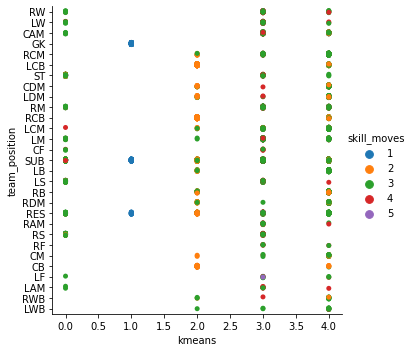

In [160]:
#Visualmente..
#Tendrá algo que ver la posicion del jugador con los skill moves??

plt.figure(figsize=(12,8))
sns.catplot(data=df_clusters, x="kmeans", y="team_position", hue="skill_moves")

In [ ]:
#En todos los clusters hay jugadores en varias posiciones y la cantidad va descendiendo 
# según el número de cluster, y en el 1 se ve sólo 1 habilidad que parece pertenecer a 3 posiciones solamente.
# en el cluster cero pareciera haber más jugadores con habilidades 3 y 4, mientras que en el dos, 
#habilidades con 2 y 3.

In [18]:
#vamos a comprobrarlo..
plt.figure(figsize=(10,6))
contingencia2 = pd.crosstab(df_clusters.kmeans, df_clusters.skill_moves)
contingencia2

skill_moves    1    2     3    4   5
kmeans                              
0              0    1   508  527  39
1              0  217  1220  217   4
2            440    0     0    0   0
3              0   56   516   72   2
4              0  835   102    0   0

<Figure size 720x432 with 0 Axes>

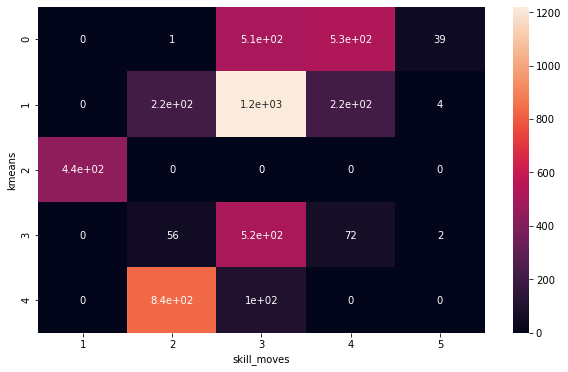

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(contingencia2, annot=True)

In [21]:
# Hay más personas con habilidad de movimiento 3 en el cluster 0! y en el cluster 3 tenemos las habilidades más altas.

In [22]:
#tabla de contingencia de las habilidades de movimiento de los jugadores con la posicion del jugador en el cluster 3
plt.figure(figsize=(10,6))
contingencia3 = pd.crosstab(df_clusters[df_clusters.kmeans==3].skill_moves, df_clusters[df_clusters.kmeans==3].team_position)
contingencia3

team_position  CAM  CF  LAM  LCM  LF  LM  LS  LW  RES  RM  RS  RW   ST  SUB
skill_moves                                                                
2                0   0    0    0   0   0   4   0    5   0   7   0   15   23
3                7   2    2    0   1   9  47   5   24   7  44   6  157  193
4                0   1    0    1   0   3   4   3    3   4   7   1   16   26
5                0   0    0    0   0   0   0   0    1   0   0   0    1    0

<Figure size 720x432 with 0 Axes>

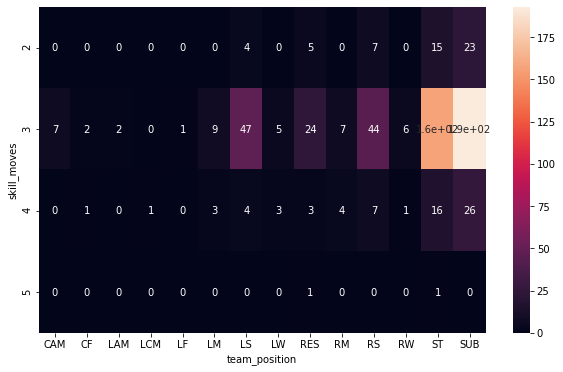

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(contingencia3, annot=True)

In [24]:
#En el cluster 3 hay más jugadores con skills moves 2 que juegan como SUB, RCB Y LCB

In [25]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [27]:
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.6119769548158525
For n_clusters = 3 The average silhouette_score is : 0.35728781181470554
For n_clusters = 4 The average silhouette_score is : 0.32845021256855517
For n_clusters = 5 The average silhouette_score is : 0.28559620359786986
For n_clusters = 6 The average silhouette_score is : 0.2338415370001382
For n_clusters = 7 The average silhouette_score is : 0.22294876355932644
For n_clusters = 8 The average silhouette_score is : 0.19746683582240235
For n_clusters = 9 The average silhouette_score is : 0.18671087675777834
For n_clusters = 10 The average silhouette_score is : 0.17616940334922845
For n_clusters = 11 The average silhouette_score is : 0.1715896977485011


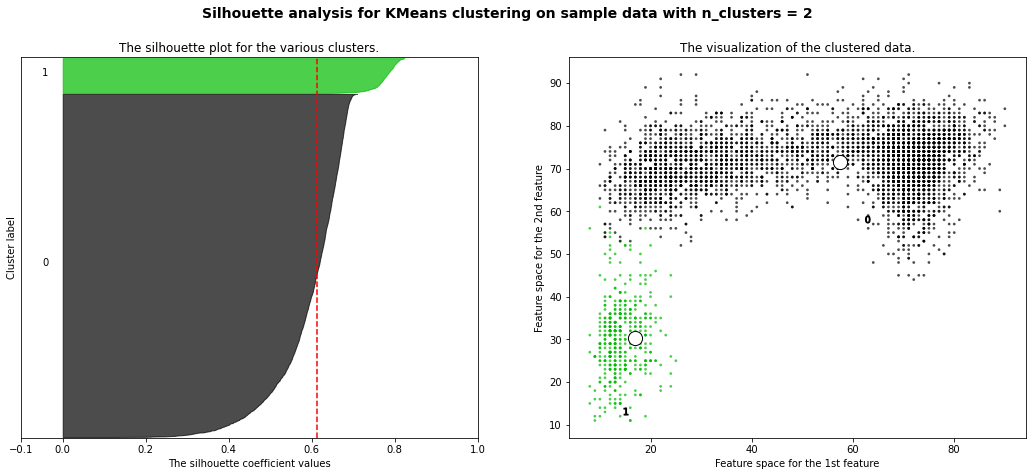

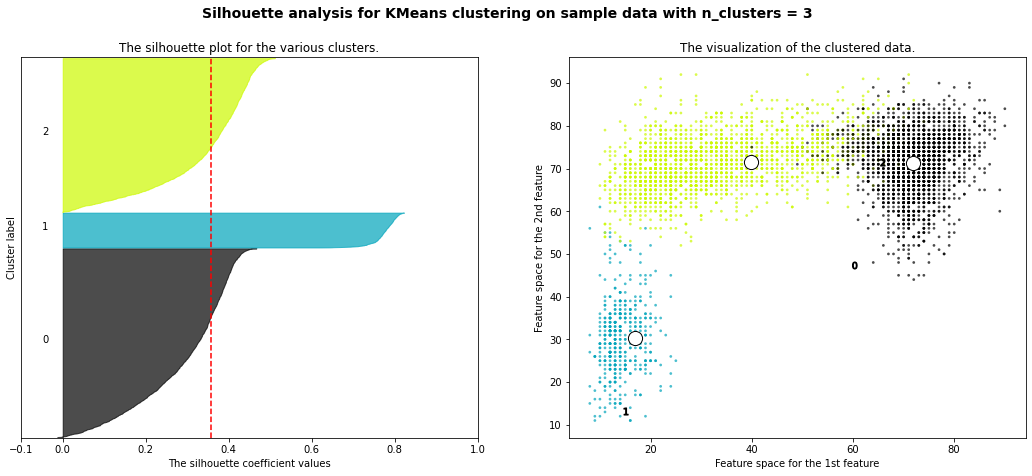

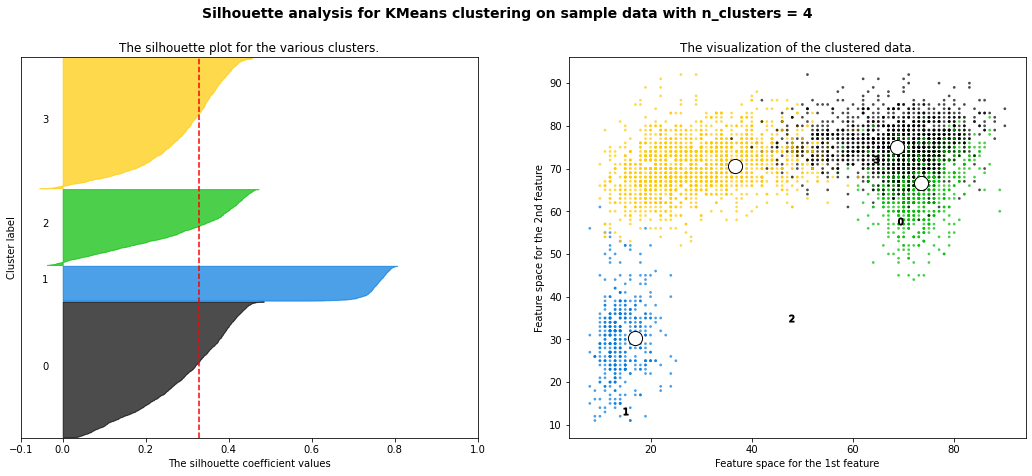

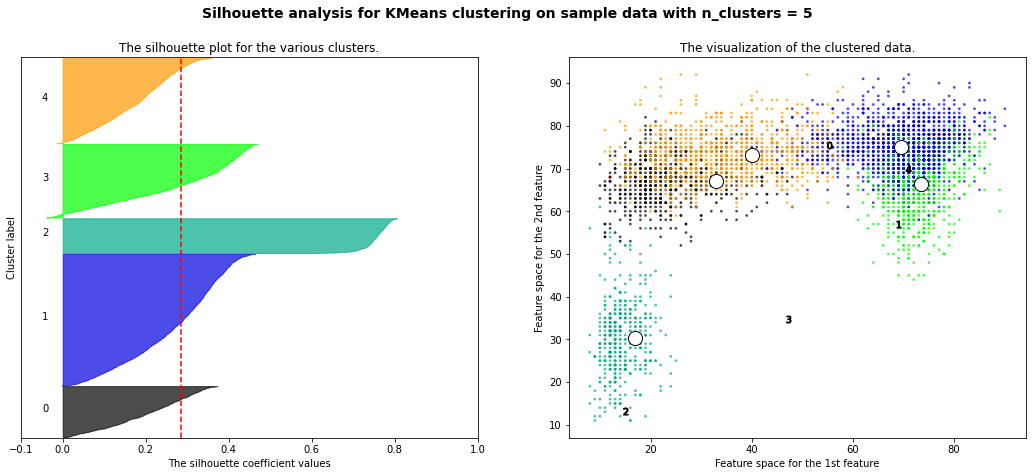

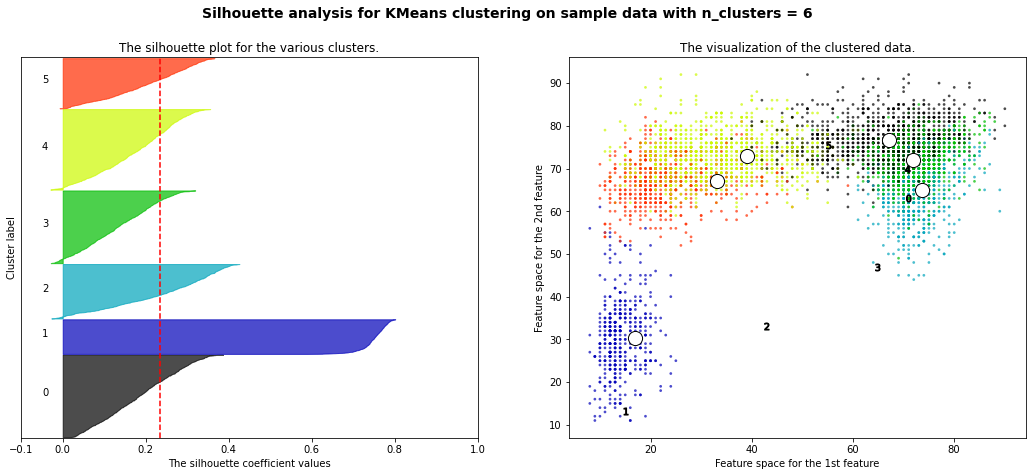

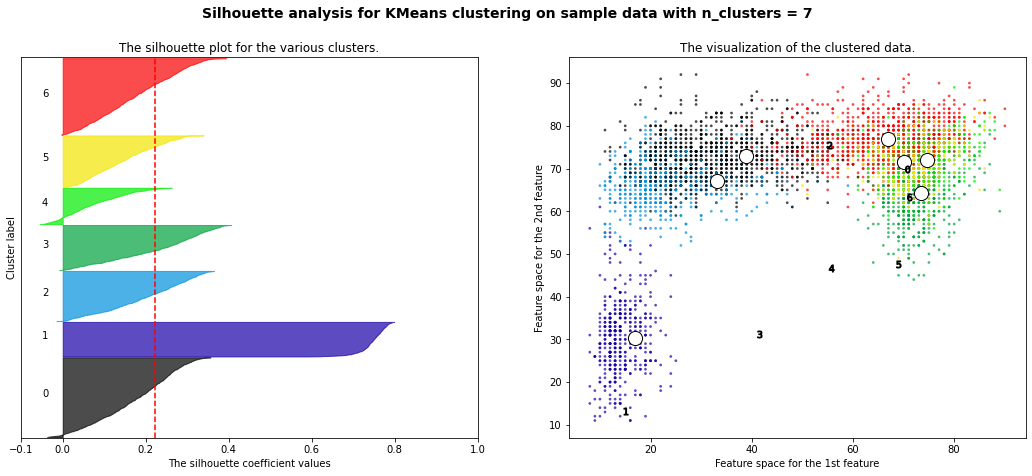

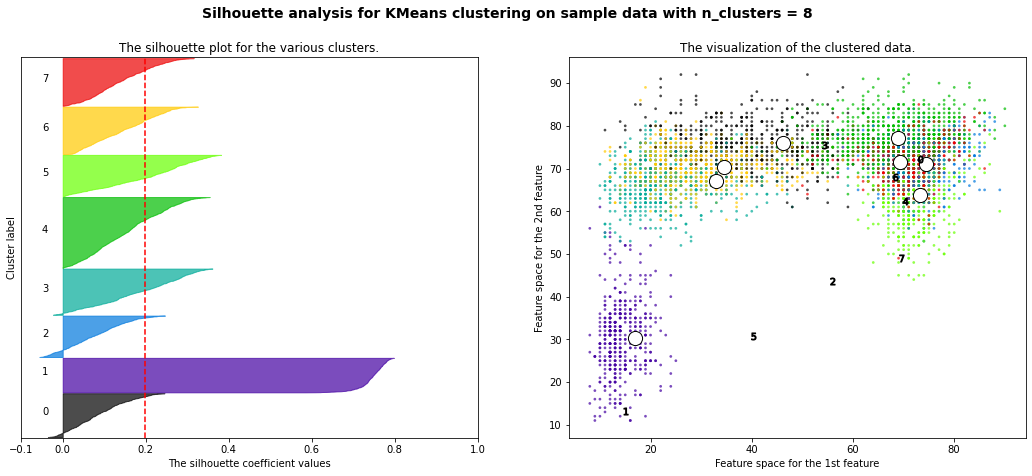

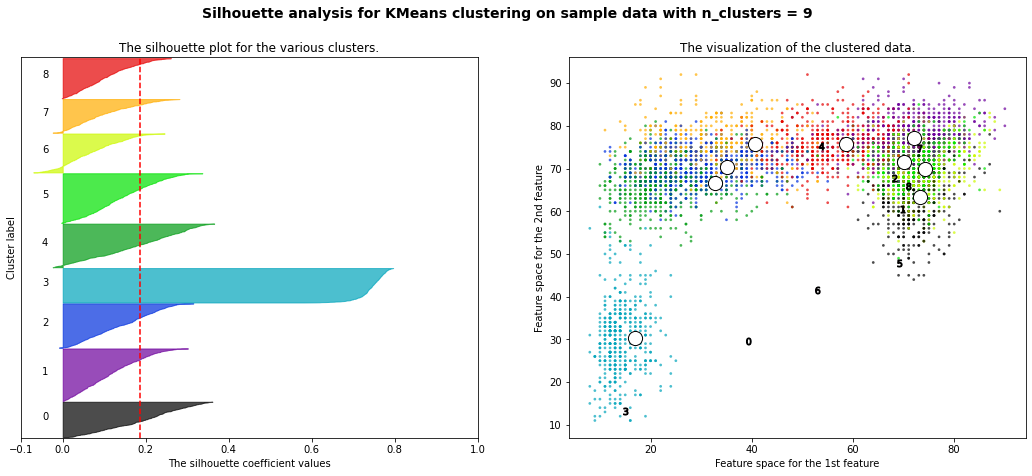

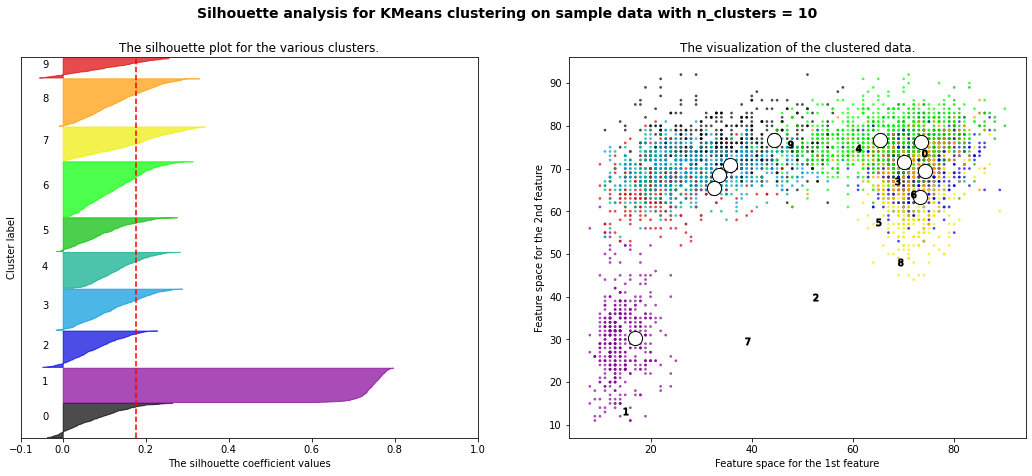

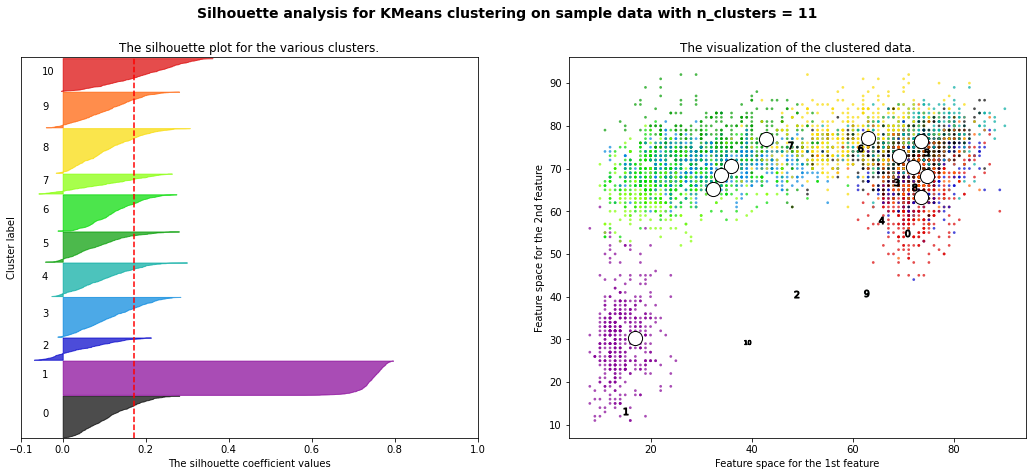

In [28]:

range_n_clusters=[2,3,4,5,6,7,8,9,10,11]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_skills) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_skills)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_skills, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_skills, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_skills[skill_1], df_skills[skill_2], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:,26], centers[:, 3], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [29]:
# A medida que va aumentando el numero de clusters, el coefficiente de siluette baja, 
# lo que quiere decir que los grupos se solapan cada vez más.
# De esta manera, si nos fijamos en este coeficiente, lo mejor sería separar los datos en dos grupos, siempre que 
# hagamos el análisis con éstas variables que dependían de la posición del jugador en general.

In [30]:
# Debido a ésto, buscaremos las variables en las que, dado el número de clusters al que forzamos para utilizar el 
# método de k-mean, los grupos se separen más. Intentamos buscar aquellas variables en donde los centroides
# se alejen más
# 

In [31]:
# Teníamos que:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

# Número de clusters buscado
n_clust = 5

km = KMeans(n_clusters=n_clust)
km.fit(df_skills)

# Recuperacion de etiquetas
clusters = km.labels_
print('Suma de los cuadrados de las distancias al cluster / Inertia: ', km.inertia_)

Suma de los cuadrados de las distancias al cluster / Inertia:  11065057.276887193


In [32]:
cent=km.cluster_centers_

In [33]:
centroide_kmean=pd.DataFrame(data=cent, columns=skills_ratings)
centroide_kmean

attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
0           47.111948            34.729817                   72.536060   
1           55.285054            75.365177                   73.365177   
2           14.945455            13.175000                   14.909091   
3           70.887546            69.914498                   53.302045   
4           68.928400            57.069795                   62.447052   

   attacking_short_passing  attacking_volleys  skill_dribbling  skill_curve  \
0                66.325081          34.748116        53.512379    41.364909   
1                67.126348          69.138675        71.057011    59.984592   
2                30.352273          13.706818        15.400000    15.740909   
3                73.250000          65.454461        77.872677    72.076208   
4                74.964501          55.845367        71.888688    66.097473   

   skill_fk_accuracy  skill_long_passing  skill_ball_control  \
0          36.879440           62.017223           62.586652   
1          51.580894           52.545455           72.775039   
2          15.034091           29.470455           22.768182   
3          65.884758           66.375465           76.949814   
4          58.936823           71.123947           74.422383   

   movement_acceleration  movement_sprint_speed  movement_agility  \
0              57.809473              60.503767         55.524220   
1              69.869029              71.506934         68.320493   
2              44.488636              44.452273         46.302273   
3              79.594796              77.815056         80.934015   
4              70.098676              69.631769         71.376655   

   movement_reactions  movement_balance  power_shot_power  power_jumping  \
0           69.817008         54.613563         56.674919      72.960172   
1           71.847458         62.491525         75.801233      73.226502   
2           71.136364         44.947727         52.845455      64.925000   
3           71.848513         77.760223         73.225836      62.618959   
4           73.088448         70.490373         71.410349      69.279182   

   power_stamina  power_strength  power_long_shots  mentality_aggression  \
0      68.516685       79.327234         40.254037             75.902045   
1      69.465331       76.944530         67.281972             63.229584   
2      33.927273       65.977273         13.956818             29.429545   
3      70.469331       59.344796         70.211896             54.434944   
4      77.832732       69.641998         65.149819             73.049940   

   mentality_interceptions  mentality_positioning  mentality_vision  \
0                73.624327              40.519914         48.616792   
1                30.140216              75.850539         62.975347   
2                19.715909              12.756818         46.470455   
3                39.102230              72.399628         72.406134   
4                71.409146              65.941637         69.027076   

   mentality_penalties  mentality_composure  defending_marking  \
0            44.302476            67.595264          73.470398   
1            69.540832            70.776579          33.075501   
2            22.175000            53.890909          16.902273   
3            65.489777            71.745353          40.052974   
4            58.297834            72.152226          69.478941   

   defending_standing_tackle  defending_sliding_tackle  goalkeeping_diving  \
0                  75.279871                 72.975242           10.648009   
1                  28.841294                 24.269646           10.659476   
2                  14.579545                 14.352273           75.765909   
3                  38.533457                 34.744424           10.578996   
4                  72.061974                 69.392298           10.595668   

   goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  
0   

In [34]:
centroide_kmean.describe()

attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
count            5.000000             5.000000                    5.000000   
mean            51.431681            50.050858                   55.311885   
std             22.635255            25.880531                   24.030862   
min             14.945455            13.175000                   14.909091   
25%             47.111948            34.729817                   53.302045   
50%             55.285054            57.069795                   62.447052   
75%             68.928400            69.914498                   72.536060   
max             70.887546            75.365177                   73.365177   

       attacking_short_passing  attacking_volleys  skill_dribbling  \
count                 5.000000           5.000000         5.000000   
mean                 62.403640          47.778687        57.946151   
std                  18.305672          23.261779        25.461681   
min                  30.352273          13.706818        15.400000   
25%                  66.325081          34.748116        53.512379   
50%                  67.126348          55.845367        71.057011   
75%                  73.250000          65.454461        71.888688   
max                  74.964501          69.138675        77.872677   

       skill_curve  skill_fk_accuracy  skill_long_passing  skill_ball_control  \
count     5.000000           5.000000            5.000000            5.000000   
mean     51.052818          45.663201           56.306509           61.900414   
std      22.852175          20.220141           16.491452           22.546309   
min      15.740909          15.034091           29.470455           22.768182   
25%      41.364909          36.879440           52.545455           62.586652   
50%      59.984592          51.580894           62.017223           72.775039   
75%      66.097473          58.936823           66.375465           74.422383   
max      72.076208          65.884758           71.123947           76.949814   

       movement_acceleration  movement_sprint_speed  movement_agility  \
count               5.000000               5.000000          5.000000   
mean               64.372122              64.781960         64.491531   
std                13.538469              12.944175         13.635275   
min                44.488636              44.452273         46.302273   
25%                57.809473              60.503767         55.524220   
50%                69.869029              69.631769         68.320493   
75%                70.098676              71.506934         71.376655   
max                79.594796              77.815056         80.934015   

       movement_reactions  movement_balance  power_shot_power  power_jumping  \
count            5.000000          5.000000          5.000000       5.000000   
mean            71.547558         62.060682         65.991558      68.601963   
std              1.195694         12.903814         10.458819       4.747509   
min             69.817008         44.947727         52.845455      62.618959   
25%             71.136364         54.613563         56.674919      64.925000   
50%             71.847458         62.491525         71.410349      69.279182   
75%             71.848513         70.490373         73.225836      72.960172   
max             73.088448         77.760223         75.801233      73.226502   

       power_stamina  power_strength  power_long_shots  mentality_aggression  \
count       5.000000        5.000000          5.000000              5.000000   
mean       64.042270       70.247166         51.370908             59.209212   
std        17.232433        8.135758         24.090466             18.681555   
min        33.927273       59.344796         13.956818             29.429545   
25%        68.516685       65.977273         40.254037             54.434944   
50%        69.465331       69.641998         65.149819             63.229584   
75% 

In [35]:
correlaciones=centroide_kmean.corr()

In [36]:
correlaciones

attacking_crossing  attacking_finishing  \
attacking_crossing                    1.000000             0.861394   
attacking_finishing                   0.861394             1.000000   
attacking_heading_accuracy            0.714708             0.680606   
attacking_short_passing               0.966259             0.815288   
attacking_volleys                     0.886353             0.998505   
skill_dribbling                       0.977588             0.934206   
skill_curve                           0.984469             0.929907   
skill_fk_accuracy                     0.985365             0.911841   
skill_long_passing                    0.934360             0.650708   
skill_ball_control                    0.969263             0.897427   
movement_acceleration                 0.955607             0.938609   
movement_sprint_speed                 0.959551             0.954012   
movement_agility                      0.937602             0.906799   
movement_reactions                    0.521432             0.533703   
movement_balance                      0.951069             0.843727   
power_shot_power                      0.837696             0.976775   
power_jumping                         0.066528             0.146082   
power_stamina                         0.940036             0.786857   
power_strength                       -0.109048            -0.039098   
power_long_shots                      0.954570             0.971869   
mentality_aggression                  0.697161             0.489404   
mentality_interceptions               0.491461             0.073366   
mentality_positioning                 0.917766             0.989630   
mentality_vision                      0.892665             0.866557   
mentality_penalties                   0.897282             0.991933   
mentality_composure                   0.968874             0.882095   
defending_marking                     0.541105             0.148002   
defending_standing_tackle             0.521058             0.111831   
defending_sliding_tackle              0.474947             0.052351   
goalkeeping_diving                   -0.901550            -0.796659   
goalkeeping_handling                 -0.902268            -0.797952   
goalkeeping_kicking                  -0.901321            -0.797007   
goalkeeping_positioning              -0.901969            -0.798872   

                            attacking_heading_accuracy  \
attacking_crossing                            0.714708   
attacking_finishing                           0.680606   
attacking_heading_accuracy                    1.000000   
attacking_short_passing                       0.861326   
attacking_volleys                             0.697588   
skill_dribbling                               0.792143   
skill_curve                                   0.676570   
skill_fk_accuracy                             0.641640   
skill_long_passing                            0.757123   
skill_ball_control                            0.852837   
movement_acceleration                         0.614597   
movement_sprint_speed                         0.705255   
movement_agility                              0.507868   
movement_reactions                            0.022708   
movement_balance                              0.483338   
power_shot_power                              0.568853   
power_jumping                                 0.709923   
power_stamina                                 0.891781   
power_strength                                0.597690   
power_long_shots                              0.720248   
mentality_aggression                          0.930891   
mentality_interceptions                       0.614964   
mentality_positioning                         0.732775   
mentality_vision                              0.391276   
mentality_penalties                           0.761413   
mentality_composure                           0.861800   
defending_marking                             0

In [37]:
minimo_corr=[]
for i in correlaciones.columns:
    minimo_corr.append(correlaciones[i].abs().min())

In [38]:
minimo={'minimo':minimo_corr}
ma=pd.DataFrame(data=minimo)
ma

minimo
0   0.066528
1   0.039098
2   0.022708
3   0.131337
4   0.036154
5   0.004264
6   0.030716
7   0.026796
8   0.041941
9   0.101538
10  0.067170
11  0.050907
12  0.156026
13  0.022708
14  0.227558
15  0.002793
16  0.026796
17  0.226678
18  0.004264
19  0.061705
20  0.049842
21  0.019901
22  0.008974
23  0.100726
24  0.038446
25  0.127493
26  0.043631
27  0.038883
28  0.002793
29  0.192866
30  0.194721
31  0.191467
32  0.193469

In [39]:
corr_min=ma['minimo'].sort_values(ascending=True)
corr_min[0:2]

28    0.002793
15    0.002793
Name: minimo, dtype: float64

In [40]:
correlaciones.columns[28]

'defending_sliding_tackle'

In [41]:
correlaciones[correlaciones.columns[28]].abs().idxmin()

'power_shot_power'

In [42]:
skills_ratings.index('defending_sliding_tackle')

28

In [43]:
skills_ratings.index('power_shot_power')

15

In [164]:
columnas_encontradas=[df_skills.columns[28],df_skills.columns[15]]

<Figure size 1008x864 with 0 Axes>

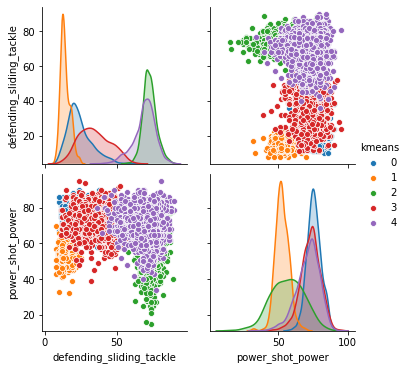

In [170]:
plt.figure(figsize=(14,12))
sns.pairplot(data=df_clusters, vars=columnas_encontradas, hue='kmeans')

In [171]:
#Se puede apreciar por los histogramas que sigue habiendo solapamiento, por lo que tal vez se tenga que
# reducir el número de clusters.

In [172]:
# Teníamos que:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

# Número de clusters buscado
n_clust = 3

km = KMeans(n_clusters=n_clust)
km.fit(df_skills)

# Recuperacion de etiquetas
clusters = km.labels_
print('Suma de los cuadrados de las distancias al cluster / Inertia: ', km.inertia_)

Suma de los cuadrados de las distancias al cluster / Inertia:  15848358.167811962


In [173]:
df_clusters=df_n.copy()
df_clusters['kmeans'] = km.labels_ #clusters
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros forzamos la cantidad')

Kmeans encontró:  3 clusters, nosotros forzamos la cantidad


<Figure size 1008x864 with 0 Axes>

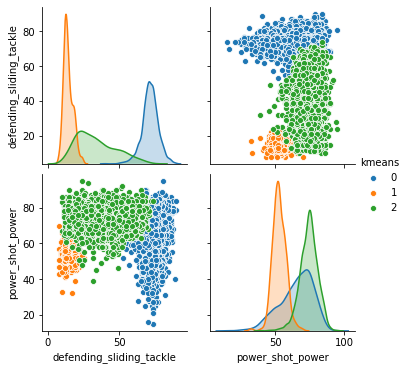

In [174]:
plt.figure(figsize=(14,12))
sns.pairplot(data=df_clusters, vars=columnas_encontradas, hue='kmeans')

In [175]:
# Graficando más grande..
data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86


#Eligo dos números entre 0 y  de n_skills-1

skill_1=skills_ratings[28]
skill_2=skills_ratings[15]


kmean_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Ckacks!!',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

# 4.-Clustering-Mean-Shift 

- NO es necesario definirle la cantidad de grupos/clusters
- NO es escalable, computacionalmente es muy pesado. Cada dato tienen un proceso iterativo en donde en cada iteración considera los vecinos a menos de un radio de distancia.
- Hipeparámetros: radio (de cobertura para cálculo de media)

In [48]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

ms = MeanShift(bandwidth=2, bin_seeding=True)

ms.fit(df_skills)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Numero estimado de clusters para Mean Shift : %d" % n_clusters_)

# Etiquetas de los elementos de los clusters


Numero estimado de clusters para Mean Shift : 4


In [49]:
df_skills.columns

Index(['attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning'],
      dtype='object')

In [50]:
data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86


#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[4]
skill_2=skills_ratings[21]


MeanShift_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters,crack]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [51]:
df_clusters['MeanShift'] = ms.labels_ #clusters2
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros lo forzamos')
print('Mean shift encontró ', max(ms.labels_)+1, 'clusters, según los hiperparámetros elegidos')

Kmeans encontró:  3 clusters, nosotros lo forzamos
Mean shift encontró  4 clusters, según los hiperparámetros elegidos


**EVALUACIÓN**

**EJERCICIO EN GRUPO: Análisis exploratorio de los clusters, usando las clases asignadas por MeanShift** 

In [52]:
#Cantidad de observaciones por Cluster
#Análisis descriptivo separando por Cluster
#Tabla de contingencia alguna categórica vs clusters
#Silohuette?


In [53]:
df_clusters.groupby(by=['MeanShift']).size()


MeanShift
0    2347
1    1359
2     610
3     440
dtype: int64

In [54]:
df_clusters.groupby(by='MeanShift').describe(include='object')

player_url         \
               count unique   
MeanShift                     
0               2347   2347   
1               1359   1359   
2                610    610   
3                440    440   

                                                                  short_name  \
                                                         top freq      count   
MeanShift                                                                      
0          https://sofifa.com/player/211009/darragh-lenih...    1       2347   
1          https://sofifa.com/player/187607/artem-dzyuba/...    1       1359   
2          https://sofifa.com/player/53914/phil-jagielka/...    1        610   
3          https://sofifa.com/player/176772/alexandre-ouk...    1        440   

                                    long_name         \
          unique           top freq     count unique   
MeanShift                                              
0           2321  J. Rodríguez    3      2347   2346   
1           1341      Paulinho    4      1359   1359   
2            606        Felipe    3       610    610   
3            439        Rafael    2       440    440   

                                              dob                          \
                                   top freq count unique         top freq   
MeanShift                                                                   
0                           Ben Davies    2  2347   1807  1988-02-29   32   
1                     Mathieu Valbuena    1  1359   1150  1992-02-29   20   
2          Éder Fabián Álvarez Balanta    1   610    558  1988-02-29    7   
3                   Christian Mathenia    1   440    403  1992-02-29    7   

          nationality                      club                              \
                count unique     top freq count unique             top freq   
MeanShift                                                                     
0                2347     99   Spain  251  2347    438         Chelsea   18   
1                1359     96  Brazil  136  1359    423         Watford    9   
2                 610     77  Brazil   61   610    321     Southampton    6   
3                 440     66   Spain   44   440    304  RSC Anderlecht    4   

          player_positions                      preferred_foot                \
                     count unique      top freq          count unique    top   
MeanShift                                                                      
0                     2347    294  CDM, CM  267           2347      2  Right   
1                     1359    184       ST  464           1359      2  Right   
2                      610     17       CB  504            610      2  Right   
3                      440      1       GK  440            440      2  Right   

                work_rate                            body_type                 \
           freq     count unique            top freq     count unique     top   
MeanShift                                                                       
0          1659      2347      8  Medium/Medium  818      2347      4  Normal   
1          1063      1359      7    High/Medium  476      1359      7  Normal   
2           489       610      8  Medium/Medium  248       610      3  Normal   
3           380       440      1  Medium/Medium  440       440      4  Normal   

                real_face                  player_tags                         \
           freq     count unique top  freq       count unique        top freq   
MeanShift                                                                       
0          1396      2347      2  No  1521         380     60    #Engine  117   
1           771      1359      2  No   960         355     39   #Acrobat   85   
2           424       610      2  No   445         144      9  #Strength  105   
3           319       440      2  No   312           0      0        NaN  NaN   

          team_position         ...    cm      

In [55]:
df_clusters.groupby(by='MeanShift').describe()[skills_ratings]

attacking_crossing                                                 \
                       count       mean        std   min    25%   50%   75%   
MeanShift                                                                     
0                     2347.0  67.786962   9.532541  24.0  63.00  69.0  74.0   
1                     1359.0  63.337013  11.553858  25.0  58.00  66.0  71.0   
2                      610.0  41.491803  11.270991  11.0  33.25  40.0  49.0   
3                      440.0  14.945455   4.477402   6.0  12.00  14.0  18.0   

                attacking_finishing                                          \
            max               count       mean        std   min   25%   50%   
MeanShift                                                                     
0          93.0              2347.0  56.668513  12.604653  20.0  48.0  58.0   
1          91.0              1359.0  72.640177   6.178079  51.0  69.0  73.0   
2          72.0               610.0  32.024590   8.817678  13.0  25.0  31.0   
3          35.0               440.0  13.175000   3.302351   5.0  11.0  13.0   

                      attacking_heading_accuracy                              \
            75%   max                      count       mean        std   min   
MeanShift                                                                      
0          66.0  91.0                     2347.0  62.361738  10.735205  22.0   
1          76.0  95.0                     1359.0  62.320088  13.688459  20.0   
2          38.0  60.0                      610.0  73.908197   5.197078  41.0   
3          15.0  27.0                      440.0  14.909091   4.320941   7.0   

                                  attacking_short_passing             \
            25%   50%   75%   max                   count       mean   
MeanShift                                                              
0          56.0  63.0  70.0  92.0                  2347.0  74.221559   
1          51.0  65.0  73.0  93.0                  1359.0  69.938926   
2          71.0  74.0  77.0  90.0                   610.0  64.498361   
3          12.0  14.0  17.0  47.0                   440.0  30.352273   

                                                  attacking_volleys  \
                std   min   25%   50%   75%   max             count   
MeanShift                                                             
0          5.339808  49.0  71.0  74.0  78.0  92.0            2347.0   
1          5.776389  52.0  66.0  70.0  74.0  92.0            1359.0   
2          6.449310  44.0  60.0  65.0  69.0  79.0             610.0   
3          8.677780  11.0  25.0  30.0  35.0  61.0             440.0   

                                                              skill_dribbling  \
                mean        std   min   25%   50%   75%   max           count   
MeanShift                                                                       
0          55.181934  13.211850  16.0  46.0  56.0  65.0  90.0          2347.0   
1          67.045622   8.610760  36.0  62.0  68.0  73.0  90.0          1359.0   
2          32.408197   9.651000  11.0  26.0  31.0  37.0  62.0           610.0   
3          13.706818   3.371183   5.0  11.0  13.0  16.0  26.0           440.0   

                                                             skill_curve  \
                mean       std   min   25%   50%   75%   max       count   
MeanShift                                                                  
0          71.177248  7.422296  38.0  67.0  72.0  76.0  92.0      2347.0   
1          74.946284  6.120842  53.0  71.0  75.0  79.0  97.0      1359.0   
2          49.498361  9.393470  22.0  44.0  50.0  57.0  69.0       610.0   
3          15.400000  4.273028   7.0  12.0  15.0  18.0  30.0       440.0   

                      ... defending_marking       defending_standing_tackle  \
                mean  ...               75%   max                     count   
MeanShift             ...                                                     


In [56]:
#tabla de contigencia
plt.figure(figsize=(10,6))
cont_meanshift = pd.crosstab(df_clusters.MeanShift, df_clusters.body_type)
cont_meanshift

body_type  C. Ronaldo  Courtois  Lean  Messi  Neymar  Normal  \
MeanShift                                                      
0                   0         0   819      0       0    1396   
1                   1         0   475      1       1     771   
2                   0         0   136      0       0     424   
3                   0         1    95      0       0     319   

body_type  PLAYER_BODY_TYPE_25  Shaqiri  Stocky  
MeanShift                                        
0                            0        1     131  
1                            1        0     109  
2                            0        0      50  
3                            0        0      25

<Figure size 720x432 with 0 Axes>

In [57]:
plt.figure(figsize=(10,6))
cont_meanshift = pd.crosstab(df_clusters.MeanShift, df_clusters.work_rate)
cont_meanshift

work_rate  High/High  High/Low  High/Medium  Low/High  Low/Medium  \
MeanShift                                                           
0                350        54          622        48          27   
1                107       185          476         0           1   
2                  8         1           21        75          70   
3                  0         0            0         0           0   

work_rate  Medium/High  Medium/Low  Medium/Medium  
MeanShift                                          
0                  386          42            818  
1                   23         200            367  
2                  186           1            248  
3                    0           0            440

<Figure size 720x432 with 0 Axes>

In [58]:
plt.figure(figsize=(10,6))
cont_meanshift = pd.crosstab(df_clusters.MeanShift, df_clusters.club)
cont_meanshift

club        SSV Jahn Regensburg  1. FC Heidenheim 1846  1. FC Köln  \
MeanShift                                                            
0                             0                      1          10   
1                             1                      1           7   
2                             1                      2           2   
3                             0                      1           2   

club       1. FC Nürnberg  1. FC Union Berlin  1. FSV Mainz 05  AD Alcorcón  \
MeanShift                                                                     
0                       5                   5               10            1   
1                       5                   4                5            1   
2                       2                   3                3            1   
3                       1                   1                2            2   

club       ADO Den Haag  AEK Athens  AIK  AJ Auxerre  AS Monaco  \
MeanShift                                                         
0                     1          11    2           0          9   
1                     0           3    3           1          7   
2                     1           3    1           0          2   
3                     0           2    0           0          3   

club       AS Saint-Étienne  AZ Alkmaar  Aalborg BK  Aberdeen  Ajax  Al Ahli  \
MeanShift                                                                      
0                        10           7           0         0    12        3   
1                         5           3           2         0     7        3   
2                         1           1           1         1     1        1   
3                         1           1           1         1     2        1   

club       Al Ain FC  Al Faisaly  Al Fateh  Al Fayha  Al Hazem  Al Hilal  \
MeanShift                                                                  
0                  1           0         1         1         0         7   
1                  2           2         0         1         1         5   
2                  0           0         0         0         0         1   
3                  1           0         0         0         0         0   

club       Al Ittihad  Al Nassr  Al Raed  Al Shabab  Al Taawoun  Al Wehda  \
MeanShift                                                                   
0                   5         4        0          1           2         3   
1                   2         2        1          3           2         1   
2                   1         0        0          2           0         1   
3                   1         1        0          1           1         0   

club       Alanyaspor  Albacete BP  Alianza Petrolera  Amiens SC  \
MeanShift                                                          
0                   9            3                  1          7   
1                   3            3                  0          7   
2                   0            1                  0          2   
3                   1            1                  0          1   

club       América de Cali  Angers SCO  Antalyaspor  Argentinos Juniors  \
MeanShift                                                                 
0                        1           7            4                   3   
1                        2           6            4                   2   
2                        0           3            0                   1   
3                        0           1            1                   0   

club       Arsenal  Arsenal de Sarandí  Ascoli  Aston Villa  Atalanta  \
MeanShift                                                               
0               14                   0       0            8         8   
1                5                   1       2            5         4   
2                2                   1       0            2         4   
3                2                   0       0            3         2   

c

<Figure size 720x432 with 0 Axes>

In [59]:
plt.figure(figsize=(10,6))
cont_meanshift = pd.crosstab(df_clusters.MeanShift, df_clusters.team_position)
cont_meanshift

team_position  CAM  CB  CDM  CF  CM   GK  LAM   LB  LCB  LCM  LDM  LF   LM  \
MeanShift                                                                    
0               84  14   79   3  28    0    5  163   96  140   96   6   56   
1               64   0    0   6   1    0    8    0    0   14    0   5  109   
2                0  26    3   0   1    0    0    1  160    0    3   0    0   
3                0   0    0   0   0  279    0    0    0    0    0   0    0   

team_position  LS  LW  LWB  RAM   RB  RCB  RCM  RDM  RES  RF  RM  RS  RW  RWB  \
MeanShift                                                                       
0               8  11   14    4  176   78  149   91  120   3  70   5  20   16   
1              76  60    0    9    0    0    6    0   77   4  82  83  49    1   
2               0   0    0    0    0  184    3    5   31   0   0   0   0    0   
3               0   0    0    0    0    0    0    0   18   0   0   0   0    0   

team_position   ST  SUB  
MeanShift                
0               21  748  
1              195  481  
2                0  180  
3                0  131

<Figure size 720x432 with 0 Axes>

**Pregunta: normalizamos/estandarizamos la base?**

In [60]:
df_skills.describe()

attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
count         4756.000000          4756.000000                 4756.000000   
mean            58.254205            54.047729                   59.440706   
std             19.050531            20.475484                   18.234264   
min              6.000000             5.000000                    7.000000   
25%             49.000000            40.000000                   52.000000   
50%             65.000000            60.000000                   64.000000   
75%             72.000000            70.000000                   72.000000   
max             93.000000            95.000000                   93.000000   

       attacking_short_passing  attacking_volleys  skill_dribbling  \
count              4756.000000        4756.000000      4756.000000   
mean                 67.692178          51.813919        64.313499   
std                  13.736390          19.361427        18.867436   
min                  11.000000           5.000000         7.000000   
25%                  66.000000          38.000000        60.000000   
50%                  71.000000          56.000000        71.000000   
75%                  75.000000          67.000000        76.000000   
max                  92.000000          90.000000        97.000000   

       skill_curve  skill_fk_accuracy  skill_long_passing  skill_ball_control  \
count  4756.000000        4756.000000         4756.000000         4756.000000   
mean     57.126156          51.134777           61.882044           67.678722   
std      19.539312          19.262865           14.411183           16.125422   
min       6.000000           4.000000            9.000000            5.000000   
25%      46.000000          37.000000           57.000000           66.000000   
50%      63.000000          54.000000           65.000000           72.000000   
75%      72.000000          67.000000           72.000000           76.000000   
max      94.000000          94.000000           92.000000           96.000000   

       movement_acceleration  movement_sprint_speed  movement_agility  \
count            4756.000000            4756.000000       4756.000000   
mean               67.445963              67.626577         67.705635   
std                14.555591              14.216908         14.247976   
min                15.000000              16.000000         14.000000   
25%                59.000000              60.000000         60.000000   
50%                69.000000              70.000000         70.000000   
75%                78.000000              77.000000         77.000000   
max                97.000000              96.000000         96.000000   

       movement_reactions  movement_balance  power_shot_power  power_jumping  \
count         4756.000000       4756.000000       4756.000000    4756.000000   
mean            71.818966         65.579268         67.824432      68.627208   
std              5.571127         14.527765         11.516718      11.842802   
min             54.000000         20.000000         15.000000      29.000000   
25%             68.000000         57.000000         60.000000      62.000000   
50%             72.000000         68.000000         70.000000      70.000000   
75%             75.000000         76.000000         76.000000      77.000000   
max             96.000000         96.000000         95.000000      95.000000   

       power_stamina  power_strength  power_long_shots  mentality_aggression  \
count    4756.000000     4756.000000       4756.000000           4756.000000   
mean       69.143398       69.861648         56.986964             64.019975   
std        14.877588       11.540401         19.780760             17.001287   
min        13.000000       26.000000          5.000000             11.000000   
25%        65.000000       63.000000         47.000000             55.000000   
50%        72.000000       71.000000         64.000000             69.000000   
75% 

In [61]:
df_skills.min()

attacking_crossing             6
attacking_finishing            5
attacking_heading_accuracy     7
attacking_short_passing       11
attacking_volleys              5
skill_dribbling                7
skill_curve                    6
skill_fk_accuracy              4
skill_long_passing             9
skill_ball_control             5
movement_acceleration         15
movement_sprint_speed         16
movement_agility              14
movement_reactions            54
movement_balance              20
power_shot_power              15
power_jumping                 29
power_stamina                 13
power_strength                26
power_long_shots               5
mentality_aggression          11
mentality_interceptions        7
mentality_positioning          3
mentality_vision              10
mentality_penalties            9
mentality_composure           17
defending_marking              7
defending_standing_tackle      7
defending_sliding_tackle       8
goalkeeping_diving             1
goalkeepin

In [62]:
df_skills.max()

attacking_crossing            93
attacking_finishing           95
attacking_heading_accuracy    93
attacking_short_passing       92
attacking_volleys             90
skill_dribbling               97
skill_curve                   94
skill_fk_accuracy             94
skill_long_passing            92
skill_ball_control            96
movement_acceleration         97
movement_sprint_speed         96
movement_agility              96
movement_reactions            96
movement_balance              96
power_shot_power              95
power_jumping                 95
power_stamina                 97
power_strength                95
power_long_shots              94
mentality_aggression          95
mentality_interceptions       92
mentality_positioning         95
mentality_vision              94
mentality_penalties           92
mentality_composure           96
defending_marking             94
defending_standing_tackle     92
defending_sliding_tackle      90
goalkeeping_diving            90
goalkeepin

In [63]:
##Se podría decir que el rango de las variables es el mismo, entre 0 y 100, por lo que no haría
## falta una estandarización

In [64]:
#Algunas variables toman su mínimo en 20, pero es un valor dentro del rango. 

# Revisar todo con los objetivos planteados: encontrar 4 agrupamientos relacionados con la posicion del jugador 
# en el equipo

**Ahora vemos que agrupamientos podemos hacer excluyendo los arqueros**

# 5.-Clustering-con-Kmeans-sin-arqueros

In [65]:
df_skills.columns

Index(['attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning'],
      dtype='object')

In [66]:
n=10000

df_n=df.loc[:n]
df_n=df_n[(df_n["team_position"]!='GK')&(df_n['overall']>69)]

skills_ratings = ['attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle']

df_skills=df_n[skills_ratings]


In [67]:
df_skills.columns

Index(['attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle'],
      dtype='object')

In [68]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

# Número de clusters buscado
n_clust = 3

km = KMeans(n_clusters=n_clust)
km.fit(df_skills)

# Recuperacion de etiquetas
clusters = km.labels_


In [69]:
data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86


#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[15]
skill_2=skills_ratings[28]


kmean_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=4,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

# 6.-Clustering-Mean-Shift-sin-arqueros 

In [70]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition


ms = MeanShift(bandwidth=2, bin_seeding=True)

ms.fit(df_skills)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Numero de clusters encontrado por Mean Shift : %d" % n_clusters_)


Numero de clusters encontrado por Mean Shift : 13


In [71]:
df_skills.columns

Index(['attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle'],
      dtype='object')

In [72]:
data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86


#Elijo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[15]
skill_2=skills_ratings[28]


MeanShift_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters,crack]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [73]:
#Nos fijamos si podemos mejorar esta visualizacion buscando las variables donde mejor se vea la separacion
#Buscamos los centroides

In [74]:
centroide_meanshift=pd.DataFrame(data=cluster_centers, columns=skills_ratings)
centroide_meanshift

attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
0                 74.0                 66.0                        58.0   
1                 74.0                 52.0                        56.0   
2                 74.0                 50.0                        60.0   
3                 72.0                 66.0                        54.0   
4                 72.0                 38.0                        70.0   
5                 71.0                 54.0                        67.0   
6                 70.0                 50.0                        60.0   
7                 70.0                 48.0                        60.0   
8                 62.0                 74.0                        82.0   
9                 60.0                 78.0                        72.0   
10                48.0                 80.0                        76.0   
11                44.0                 72.0                        76.0   
12                30.0                 30.0                        68.0   

    attacking_short_passing  attacking_volleys  skill_dribbling  skill_curve  \
0                      74.0               74.0             78.0         76.0   
1                      76.0               66.0             78.0         72.0   
2                      70.0               68.0             70.0         70.0   
3                      82.0               68.0             76.0         70.0   
4                      68.0               35.0             60.0         34.0   
5                      64.0               42.0             74.0         57.0   
6                      68.0               56.0             68.0         60.0   
7                      66.0               60.0             68.0         62.0   
8                      68.0               82.0             70.0         77.0   
9                      66.0               74.0             76.0         66.0   
10                     70.0               72.0             74.0         68.0   
11                     58.0               66.0             66.0         44.0   
12                     58.0               44.0             48.0         32.0   

    skill_fk_accuracy  skill_long_passing  skill_ball_control  \
0                72.0                70.0                80.0   
1                64.0                76.0                78.0   
2                66.0                66.0                72.0   
3                76.0                78.0                78.0   
4                22.0                64.0                68.0   
5                38.0                66.0                70.0   
6                50.0                62.0                70.0   
7                48.0                60.0                70.0   
8                76.0                66.0                74.0   
9                42.0                50.0                79.0   
10               42.0                34.0                76.0   
11               44.0                38.0                68.0   
12               30.0                62.0                56.0   

    movement_acceleration  movement_sprint_speed  movement_agility  \
0                    78.0                   60.0              84.0   
1                    76.0                   72.0              81.0   
2                    66.0                   72.0              71.0   
3                    65.0                   62.0              74.0   
4                    66.0                   62.0              44.0   
5                    84.0                   88.0              68.0   
6                    84.0                   86.0              74.0   
7                    76.0                   76.0              71.0   
8                    28.0                   32.0              44.0   
9                    90.0                   90.0              80.0   
10                   72.0                   74.0              69.0   
11                   68.0                   65.0              58.0   
12         

In [75]:
correlaciones1=centroide_kmean.corr()

In [76]:
minimo_corr_meanshift=[]
for i in correlaciones1.columns:
    minimo_corr_meanshift.append(correlaciones1[i].abs().min())

In [77]:
minimo1={'minimo':minimo_corr_meanshift}
pa=pd.DataFrame(data=minimo1)
pa

minimo
0   0.066528
1   0.039098
2   0.022708
3   0.131337
4   0.036154
5   0.004264
6   0.030716
7   0.026796
8   0.041941
9   0.101538
10  0.067170
11  0.050907
12  0.156026
13  0.022708
14  0.227558
15  0.002793
16  0.026796
17  0.226678
18  0.004264
19  0.061705
20  0.049842
21  0.019901
22  0.008974
23  0.100726
24  0.038446
25  0.127493
26  0.043631
27  0.038883
28  0.002793
29  0.192866
30  0.194721
31  0.191467
32  0.193469

In [78]:
corr_min_shift=pa['minimo'].sort_values(ascending=True)
corr_min_shift[1:3]

15    0.002793
5     0.004264
Name: minimo, dtype: float64

In [79]:
correlaciones1[correlaciones1.columns[15]].abs().idxmin()

'defending_sliding_tackle'

In [80]:
skills_ratings.index('defending_sliding_tackle')

28

In [81]:
data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86


#Elijo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[15]
skill_2=skills_ratings[28]


MeanShift_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters,crack]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [82]:
#No cambiaban las variables

In [83]:
df_clusters=df_skills
df_clusters['kmeans'] = km.labels_ #clusters
df_clusters['MeanShift'] = ms.labels_ #clusters2

**Análisis exploratorio de las clases**

In [108]:
#Kmeans

In [84]:
df_clusters.groupby(by=['kmeans']).size()

kmeans
0    2868
1     200
2    2269
dtype: int64

In [104]:
columnas_principales=[df_clusters.columns[15],df_clusters.columns[28] ]

In [125]:
df_clusters.groupby(by=['kmeans'])[columnas_principales].describe()

power_shot_power                                                       \
                  count       mean        std   min    25%   50%   75%   max   
kmeans                                                                         
0                2868.0  64.675035  12.090883  15.0  57.00  67.0  74.0  95.0   
1                 200.0  51.740000   4.954304  32.0  48.75  52.0  55.0  68.0   
2                2269.0  73.621419   6.616938  39.0  70.00  74.0  78.0  95.0   

       defending_sliding_tackle                                                \
                          count       mean        std   min   25%   50%   75%   
kmeans                                                                          
0                        2868.0  70.871339   5.923225  40.0  68.0  71.0  74.0   
1                         200.0  14.500000   3.511646   8.0  12.0  14.0  17.0   
2                        2269.0  33.525782  13.602179  10.0  23.0  31.0  43.0   

              
         max  
kmeans        
0       90.0  
1       25.0  
2       74.0

In [90]:
df_clusters.groupby(by=['kmeans']).count()#['attacking_crossing']

attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
kmeans                                                                        
0                     2868                 2868                        2868   
1                      200                  200                         200   
2                     2269                 2269                        2269   

        attacking_short_passing  attacking_volleys  skill_dribbling  \
kmeans                                                                
0                          2868               2868             2868   
1                           200                200              200   
2                          2269               2269             2269   

        skill_curve  skill_fk_accuracy  skill_long_passing  \
kmeans                                                       
0              2868               2868                2868   
1               200                200                 200   
2              2269               2269                2269   

        skill_ball_control  movement_acceleration  movement_sprint_speed  \
kmeans                                                                     
0                     2868                   2868                   2868   
1                      200                    200                    200   
2                     2269                   2269                   2269   

        movement_agility  movement_reactions  movement_balance  \
kmeans                                                           
0                   2868                2868              2868   
1                    200                 200               200   
2                   2269                2269              2269   

        power_shot_power  power_jumping  power_stamina  power_strength  \
kmeans                                                                   
0                   2868           2868           2868            2868   
1                    200            200            200             200   
2                   2269           2269           2269            2269   

        power_long_shots  mentality_aggression  mentality_interceptions  \
kmeans                                                                    
0                   2868                  2868                     2868   
1                    200                   200                      200   
2                   2269                  2269                     2269   

        mentality_positioning  mentality_vision  mentality_penalties  \
kmeans                                                                 
0                        2868              2868                 2868   
1                         200               200                  200   
2                        2269              2269                 2269   

        mentality_composure  defending_marking  defending_standing_tackle  \
kmeans                                                                      
0                      2868               2868                       2868   
1                       200                200                        200   
2                      2269               2269                       2269   

        defending_sliding_tackle  MeanShift  
kmeans                                       
0                           2868       2868  
1                            200        200  
2                           2269       2269

In [106]:
df_clusters.groupby(by=['kmeans']).count()[columnas_principales]

power_shot_power  defending_sliding_tackle
kmeans                                            
0                   2868                      2868
1                    200                       200
2                   2269                      2269

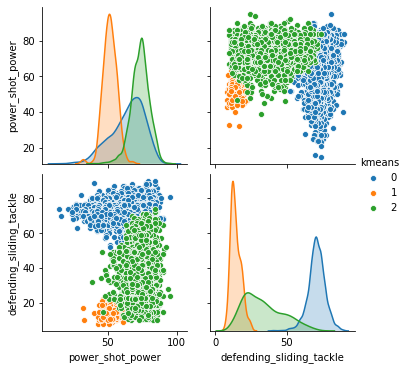

In [105]:
sns.pairplot(data=df_clusters, vars=columnas_principales, hue='kmeans')

In [109]:
#Mean shift

In [110]:
df_clusters.groupby(by=['MeanShift']).size()

MeanShift
0     541
1     172
2     678
3     311
4     451
5     142
6     471
7     594
8      14
9     891
10    307
11    226
12    539
dtype: int64

In [124]:
df_clusters.groupby(by=['MeanShift']).count()[columnas_principales]

power_shot_power  defending_sliding_tackle
MeanShift                                            
0                       541                       541
1                       172                       172
2                       678                       678
3                       311                       311
4                       451                       451
5                       142                       142
6                       471                       471
7                       594                       594
8                        14                        14
9                       891                       891
10                      307                       307
11                      226                       226
12                      539                       539

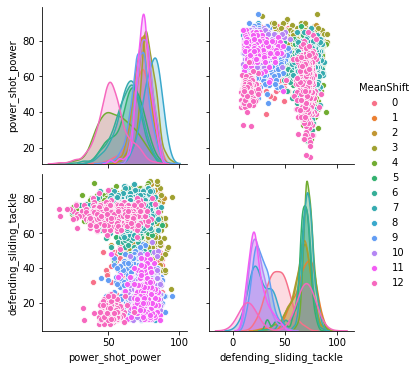

In [126]:
sns.pairplot(data=df_clusters, vars=columnas_principales, hue='MeanShift')